In [20]:
import json
import matplotlib.pyplot as plt

In [26]:
def plot_dict(stats):
    # Sort dictionary by value
    stats_sorted = dict(sorted(stats.items(), key=lambda item: item[1], reverse=True))
    
    chars = list(stats_sorted.keys())
    values = list(stats_sorted.values())

    plt.bar(range(len(stats_sorted)), values, tick_label=chars)
    plt.show()

In [37]:
def get_dictionary(filename):
    with open(filename) as json_file:
        en_dict = json.load(json_file)
    # If word has a length of 3, add a value to prefix tree to indicate it
    # Create a prefix tree
    prefix_tree = dict()
    for k in list(en_dict.keys()):
        # Prefix is also a word
        if len(k) == 3:
            prefix_tree[k] = 1
        # Prefix itself isn't a word
        elif len(k) > 3:
            prefix_tree[k[0:3]] = 0
        # Remove words smaller than length of 3
        elif len(k) < 3:
            del en_dict[k]
    return en_dict, prefix_tree

In [2]:
def count_chars(dictionary):
    # Count the total nr of each characters in dictionary
    char_counts = dict()
    # Count the nr of words that has each character
    char_occurrences = dict()
    for word in dictionary.keys():
        chars = set(list(word))
        for char in chars:
            if char_counts.get(char) == None:
                char_counts[char] = word.count(char)
                char_occurrences[char] = 1
            else:
                char_counts[char] += word.count(char)
                char_occurrences[char] += 1
    return char_counts, char_occurrences

In [43]:
# Average number of given character in words
def get_avg_char_count(char_counts, dictionary):
    avg_char_count = dict()
    for char, count in char_counts.items():
        avg_char_count[char] = count/len(dictionary.keys())
        #print(char, ":", round(count/len(dictionary.keys()), 2))
    return avg_char_count

In [44]:
# Nr of words that have given character
def get_char_proportion(char_occurrences, dictionary):
    char_proportion = dict()
    for char, count in char_occurrences.items():
        char_proportion[char] = count/len(dictionary.keys())
        #print(char, ":", round(count/len(dictionary.keys()), 2))
    return char_proportion

In [38]:
#dictionary = {"test":"", "boggle":"", "his":"", "josh":"", "toe":"", "joe":"", "she":"", "pet":""}
en_dict, prefix_tree = get_dictionary('words_dictionary.json')
char_counts, char_occurrences = count_chars(en_dict)
print(char_counts)
print(char_occurrences)

{'a': 295744, 'h': 92337, 'd': 113146, 'e': 376416, 'i': 312969, 'g': 82590, 'n': 251398, 's': 250233, 'l': 194873, 'm': 105158, 'r': 246106, 'v': 33045, 'k': 26788, 'o': 251554, 'w': 22379, 'f': 39203, 'c': 152940, 't': 230852, 'u': 131464, 'b': 63902, 'y': 70553, 'x': 10474, 'j': 5447, 'p': 113624, 'z': 14747, 'q': 5863, '-': 2}
{'a': 219645, 'h': 82787, 'd': 100158, 'e': 252856, 'i': 225887, 'g': 74973, 'n': 188577, 's': 184674, 'l': 157569, 'm': 93568, 'r': 198739, 'v': 31709, 'k': 25336, 'o': 185226, 'w': 21385, 'f': 35176, 'c': 128652, 't': 182846, 'u': 114355, 'b': 59086, 'y': 66518, 'x': 10417, 'j': 5377, 'p': 98705, 'z': 13967, 'q': 5749, '-': 2}


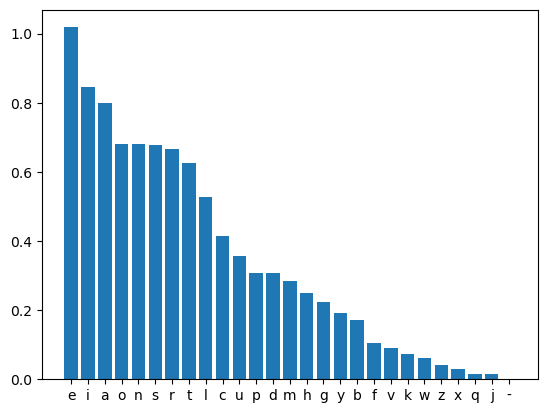

In [41]:
avg_char_count = get_avg_char_count(char_counts, en_dict)
plot_dict(avg_char_count)

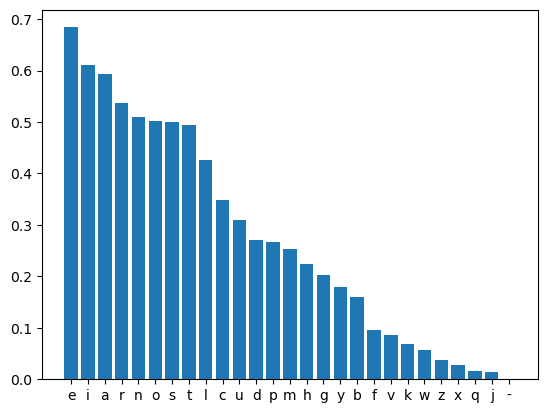

In [42]:
char_proportion = get_char_proportion(char_occurrences, en_dict)
plot_dict(char_proportion)

In [51]:
# en: https://boardgames.stackexchange.com/questions/29264/boggle-what-is-the-dice-configuration-for-boggle-in-various-languages
dice = [["R", "I", "F", "O", "B", "X"],
       ["I", "F", "E", "H", "E", "Y"],
       ["D", "E", "N", "O", "W", "S"],
       ["U", "T", "O", "K", "N", "D"],
       ["H", "M", "S", "R", "A", "O"],
       ["L", "U", "P", "E", "T", "S"],
       ["A", "C", "I", "T", "O", "A"],
       ["Y", "L", "G", "K", "U", "E"],
       ["Qu", "B", "M", "J", "O", "A"],
       ["E", "H", "I", "S", "P", "N"],
       ["V", "E", "T", "I", "G", "N"],
       ["B", "A", "L", "I", "Y", "T"],
       ["E", "Z", "A", "V", "N", "D"],
       ["R", "A", "L", "E", "S", "C"],
       ["U", "W", "I", "L", "R", "G"],
       ["P", "A", "C", "E", "M", "D"],]

dice_strings = {"".join(d).lower():1 for d in dice}
char_counts, char_occurrences = count_chars(dice_strings)

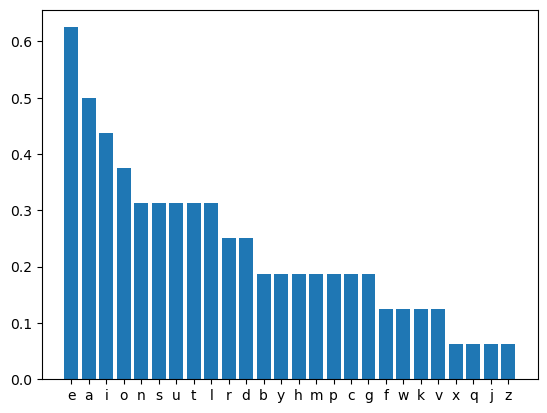

In [52]:
avg_char_count = get_avg_char_count(char_counts, dice_strings)
plot_dict(avg_char_count)

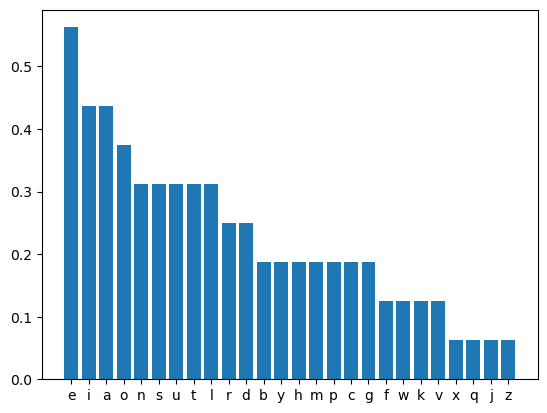

In [53]:
char_proportion = get_char_proportion(char_occurrences, dice_strings)
plot_dict(char_proportion)